<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ансамблевые модели. Случайный лес.

##### Определение

**Ансамблевые модели** или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

**Ансамбли** — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

> Говоря простыми словами, ансамбли — это объединение простых моделей в одного гиганта. Но объединять модели можно как угодно: например, взять тысячу разных логистических регрессий, а затем на их предсказаниях построить дерево решений, линейную регрессию или вообще нейронную сеть. А можно обучить сотню деревьев решений — построить целый лес, а для предсказания взять среднее. Вариаций объединения может быть сколько угодно.

Существует три проверенных способа построения ансамблей:

* Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.


Случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков.

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи классификации ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи регрессии же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

##### Бэггинг

> В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. Фрэнсис Гальтон в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

**Бэггинг** (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом** (bootstrap). Идея бутстрэпа заключается в генерации k выборок размера n (бутстрэп-выборок) из исходного набора данных размера m путём случайного выбора элементов с повторениями в каждом из наблюдений.

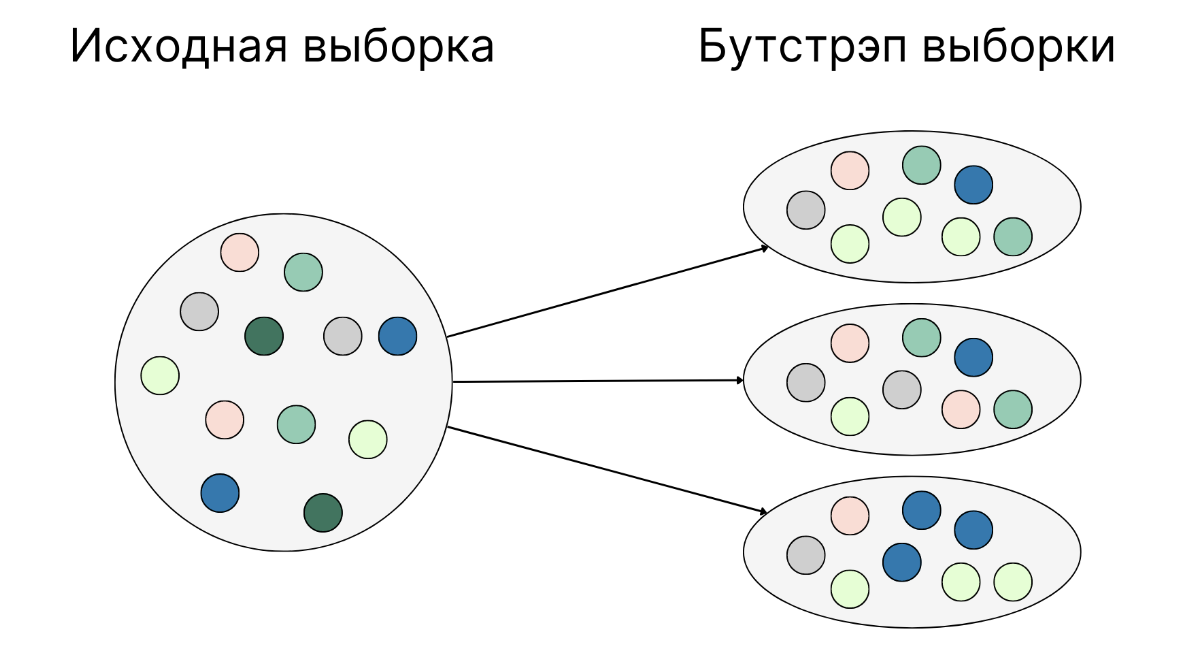

Мы взяли исходный набор данных размером m=12 наблюдений и сгенерировали k=3  бутстрэп-выборки размером n=8 наблюдений. Обратите внимание, что наблюдения в выборках могут повторяться.

В частном случае можно генерировать выборки того же размера, то есть . Таким образом, мы из набора данных создаём  датасетов из исходного того же размера.

> Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Давайте обучим k одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

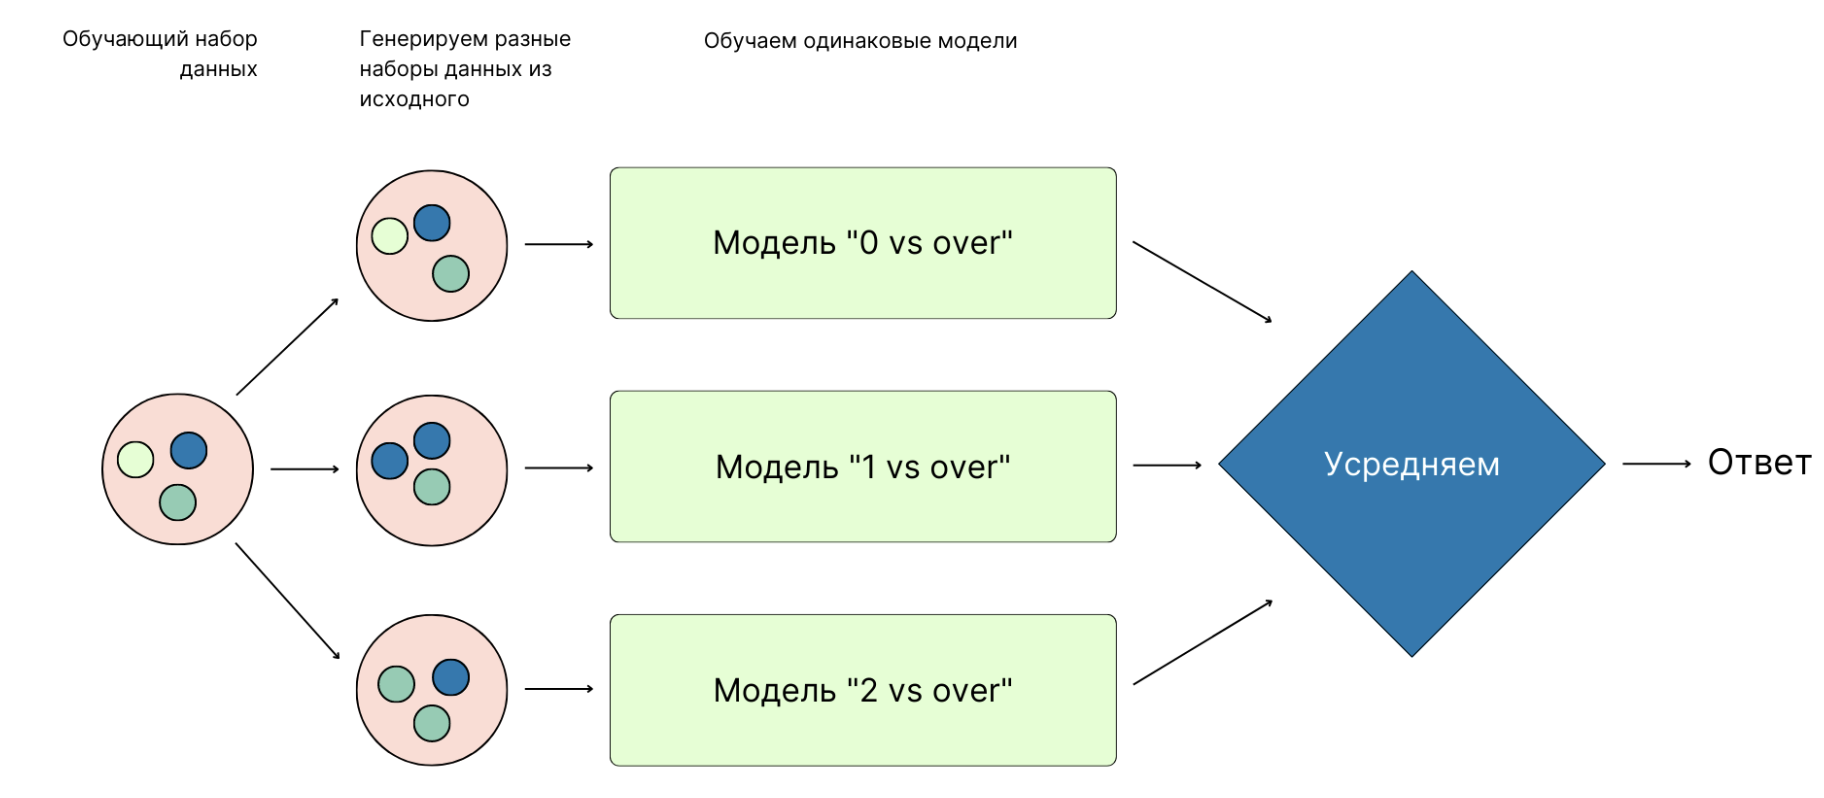

> В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью** (base model). Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.



**Случайный лес** (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений.

> Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.






Алгоритм построения случайного леса для задачи классификации:

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить дерево решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

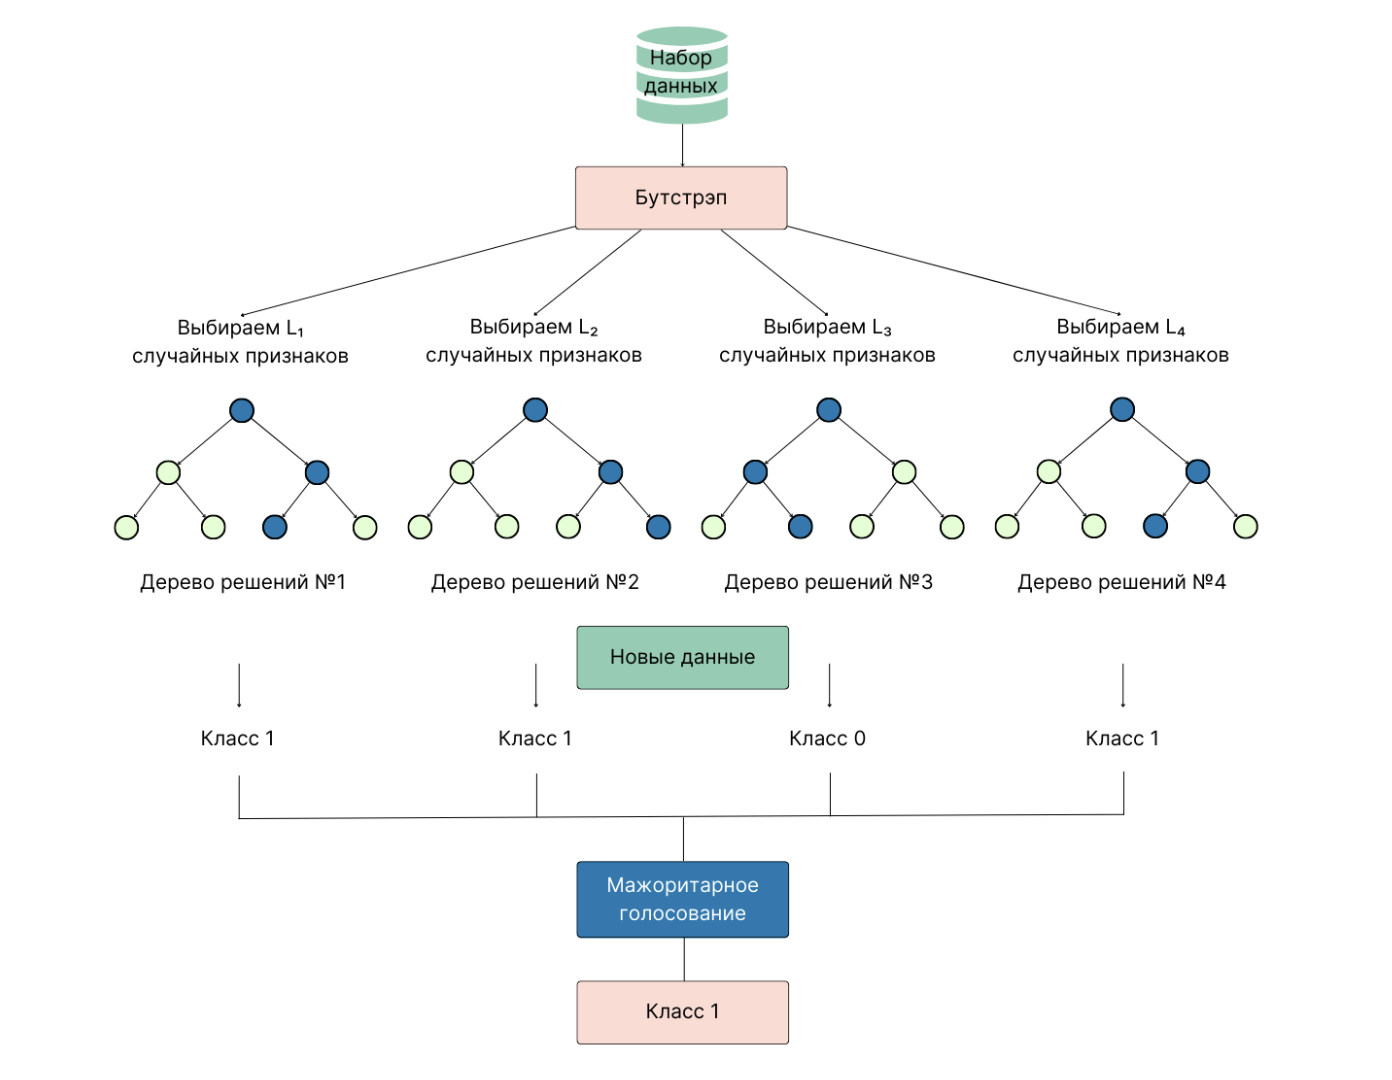

##### Практика!

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики


from sklearn.datasets import load_diabetes
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Конечно же, ансамблевые алгоритмы вручную пишут очень редко. Для этого есть библиотеки, такие как `sklearn`.

В sklearn все ансамблевые методы реализованы в модуле `ensemble`. Давайте импортируем его:

In [ ]:
from sklearn import ensemble #ансамбли

In [ ]:
diabetes_data = pd.read_csv('drive/MyDrive/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


По традиции сначала построим модель на двух признаках (`Glucose` и `BMI`) и посмотрим, как будет выглядеть разделяющая поверхность случайного леса.

In [ ]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

В библиотеке `sklearn` модель случайного леса для решения задачи классификации реализована в классе `RandomForestClassifier`.

**Основные параметры RandomForestClassifier:**

* `n_estimators` — количество деревьев в лесу (число K из бэггинга; по умолчанию равно 100);
* `criterion` — критерий информативности разбиения для каждого из деревьев (`'gini'` — критерий Джини и `'entropy'` — энтропия Шеннона; по умолчанию — `'gini'`);
* `max_depth` — максимальная глубина одного дерева (по умолчанию — `None`, то есть глубина дерева не ограничена);
* `max_features` — максимальное число признаков, которые будут использоваться каждым из деревьев (число L из метода случайных подпространств; по умолчанию — `'sqrt'`; для обучения каждого из деревьев используется $\sqrt{m}$ признаков, где $m$ — число признаков в начальном наборе данных);
* `min_samples_leaf` — минимальное число объектов в листе (по умолчанию — 1);
* `random_state` — параметр, отвечающий за генерацию случайных чисел.

Давайте создадим лес из 500 деревьев решений с максимальной глубиной 3. В качестве критерия информативности будем использовать энтропию. Число признаков в каждом дереве будем вычислять как $\sqrt{m}$.

Затем обучим модель случайного леса с помощью метода `fit()`, сделаем предсказание классов с помощью метода `predict()` и рассчитаем метрики.

In [ ]:
#Создаём объект класса случайный лес
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель
rf_clf_2d.fit(X, y)

#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



> К сожалению, визуализировать то, как случайный лес принимает решение, как мы это делали с одним деревом решений, у нас не получится, так как в таком случае пришлось бы визуализировать 500 деревьев.

Однако мы можем построить разделяющую поверхность нашего леса, воспользовавшись функцией `plot_probabilities_2d()`:

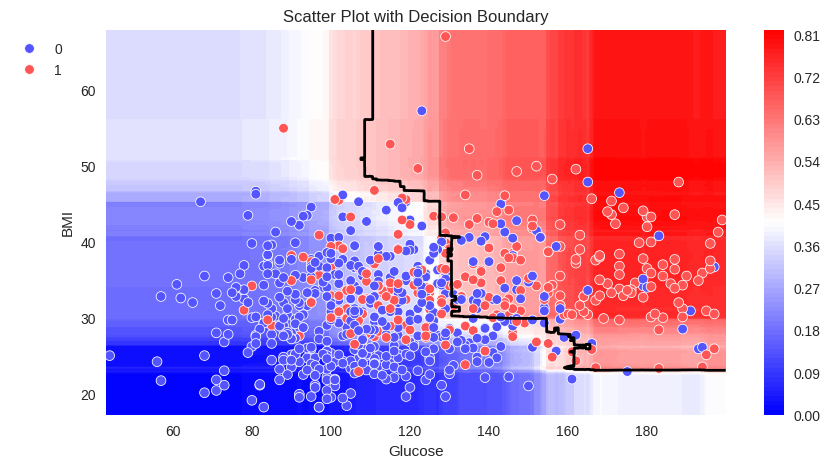

In [ ]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199,
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку.
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X, y, rf_clf_2d)

Обратите внимание на то, как отличаются разделяющие поверхности одного дерева решений и целого леса из деревьев. При этом их максимальная глубина и критерии информативности идентичны. Эта разделяющая поверхность вычисляется на основе усреднения 500 различных разделяющих поверхностей базовых моделей.

In [ ]:
# А теперь используем для предсказания все признаки из набора данных:

#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [ ]:
#Создаём объект класса RanndomForest
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель
rf_clf_full.fit(X, y)

#Делаем предсказание класса
y_pred = rf_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



Если мы захотим предсказывать не классы, а вероятности, чтобы, например, подобрать оптимальный порог вероятности, то сработает уже знакомый нам метод `predict_proba()`:

In [ ]:
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

Метод возвращает вероятности принадлежности к классам 0 и 1 (отсутствие и наличие диабета соответственно) для каждого объекта из выборки.

> К сожалению, визуализировать построенный лес в виде дерева, как и построить разделяющую поверхность леса, не получится. Это утверждение относится ко всем ансамблевым алгоритмам. Человеку сложно понять, по какому принципу ансамбль принимает решение. Это один из основных их недостатков.

Однако так как случайный лес основан на деревьях решений, у него есть атрибут `feature_importances_`, в котором находятся коэффициенты важности каждого из признаков. Построим столбчатую диаграмму, иллюстрирующую показатели важности для каждого признака.

In [ ]:
rf_clf_full.feature_importances_

array([0.07236181, 0.3335561 , 0.05629632, 0.07408006, 0.20732916,
       0.10627658, 0.15009997])

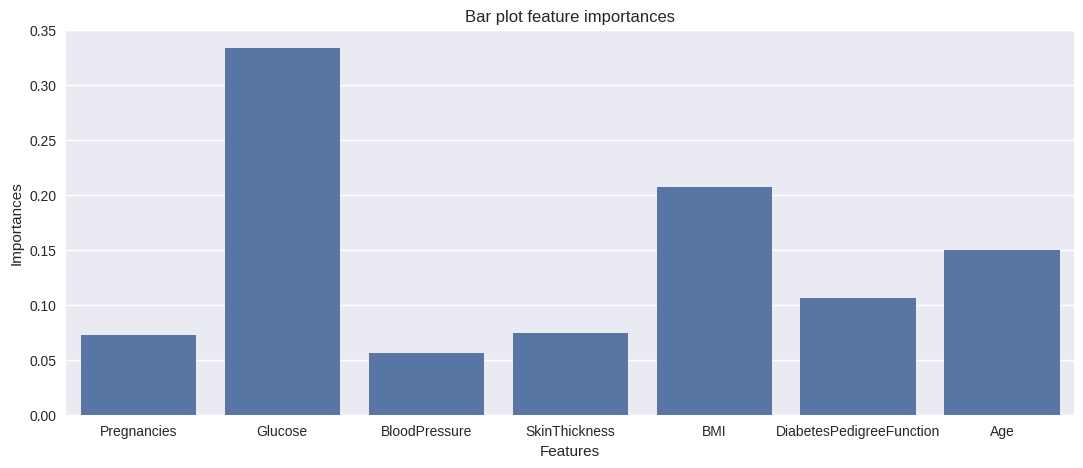

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева.

Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком.

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой.

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression).

In [ ]:
from sklearn.datasets import load_diabetes


# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

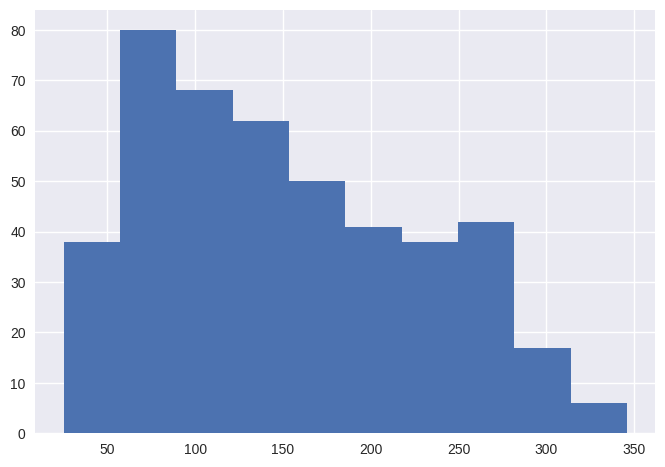

In [ ]:
# Посмотрим на распределение целевого признака
y.hist()

In [ ]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


In [ ]:
# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')

Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе

##### Стекинг


**Стекинг** (stacking) — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются метапризнаками.
Простейшая реализация стекинга заключается в блендинге (blending).

Схематично блендинг можно представить следующим образом:

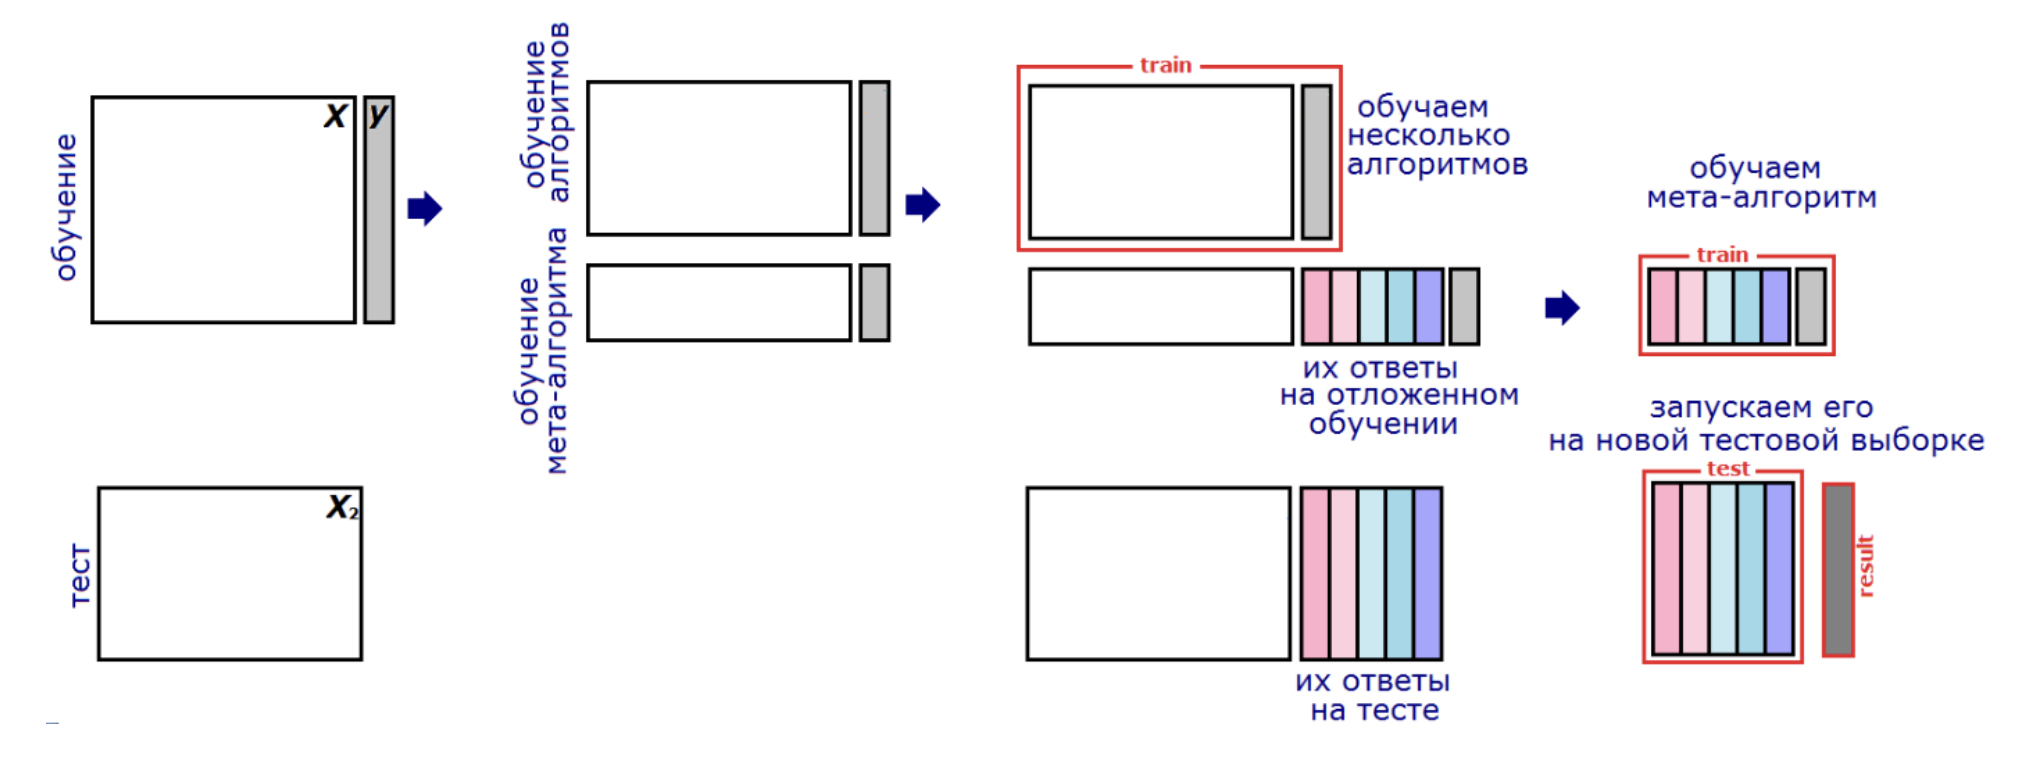

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка , которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – метапризнаки, на которых уже и обучается в дальнейшем метамодель.

> Недостатки блендинга видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных.

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование кросс-валидации.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — m, количество наблюдений — n, количество моделей в стекинге — K.

1. Обучающая выборка разбивается на L равных частей, называемых фолдами. Например, для трёх фолдов (L=3) схематично это будет выглядеть следующим образом:

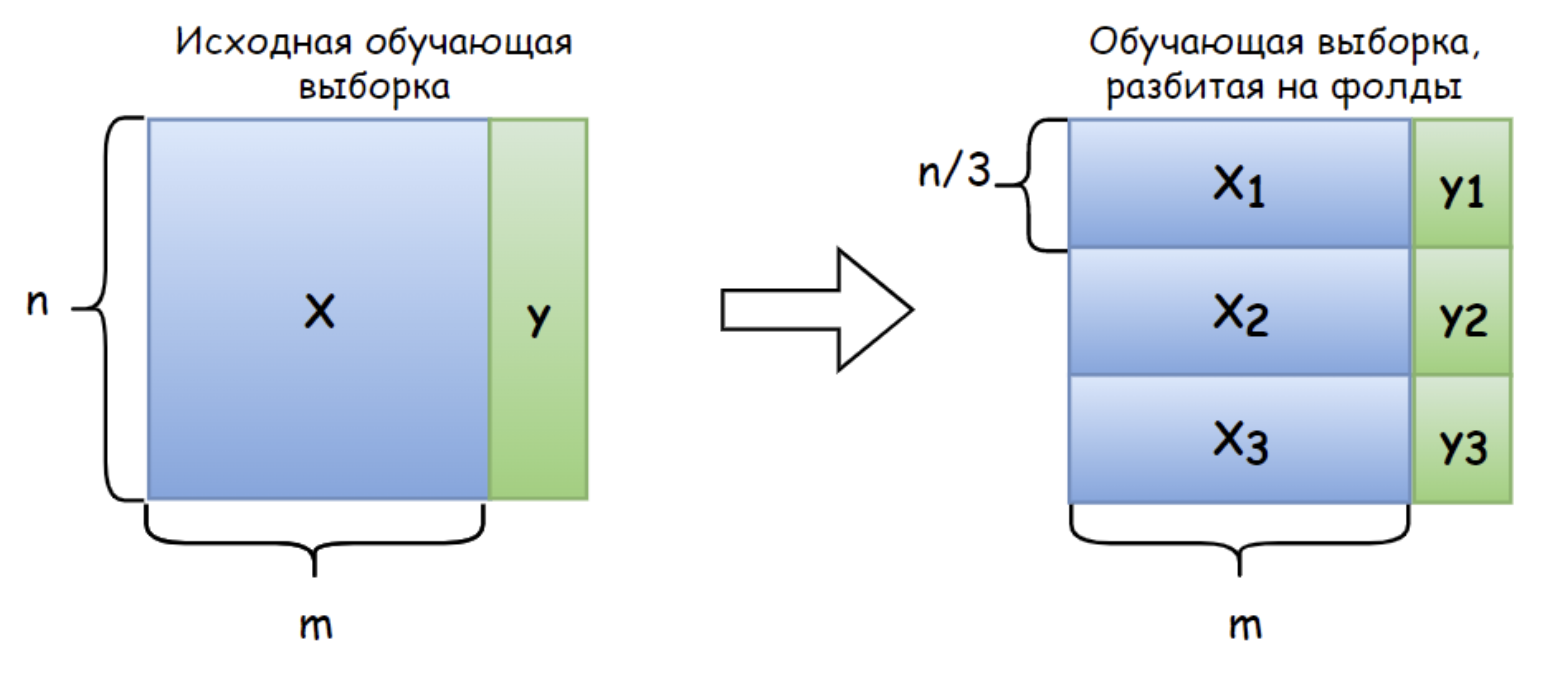

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются L-1 фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано L предсказаний, из которых формируется метапризнак Mj, где j — номер модели:

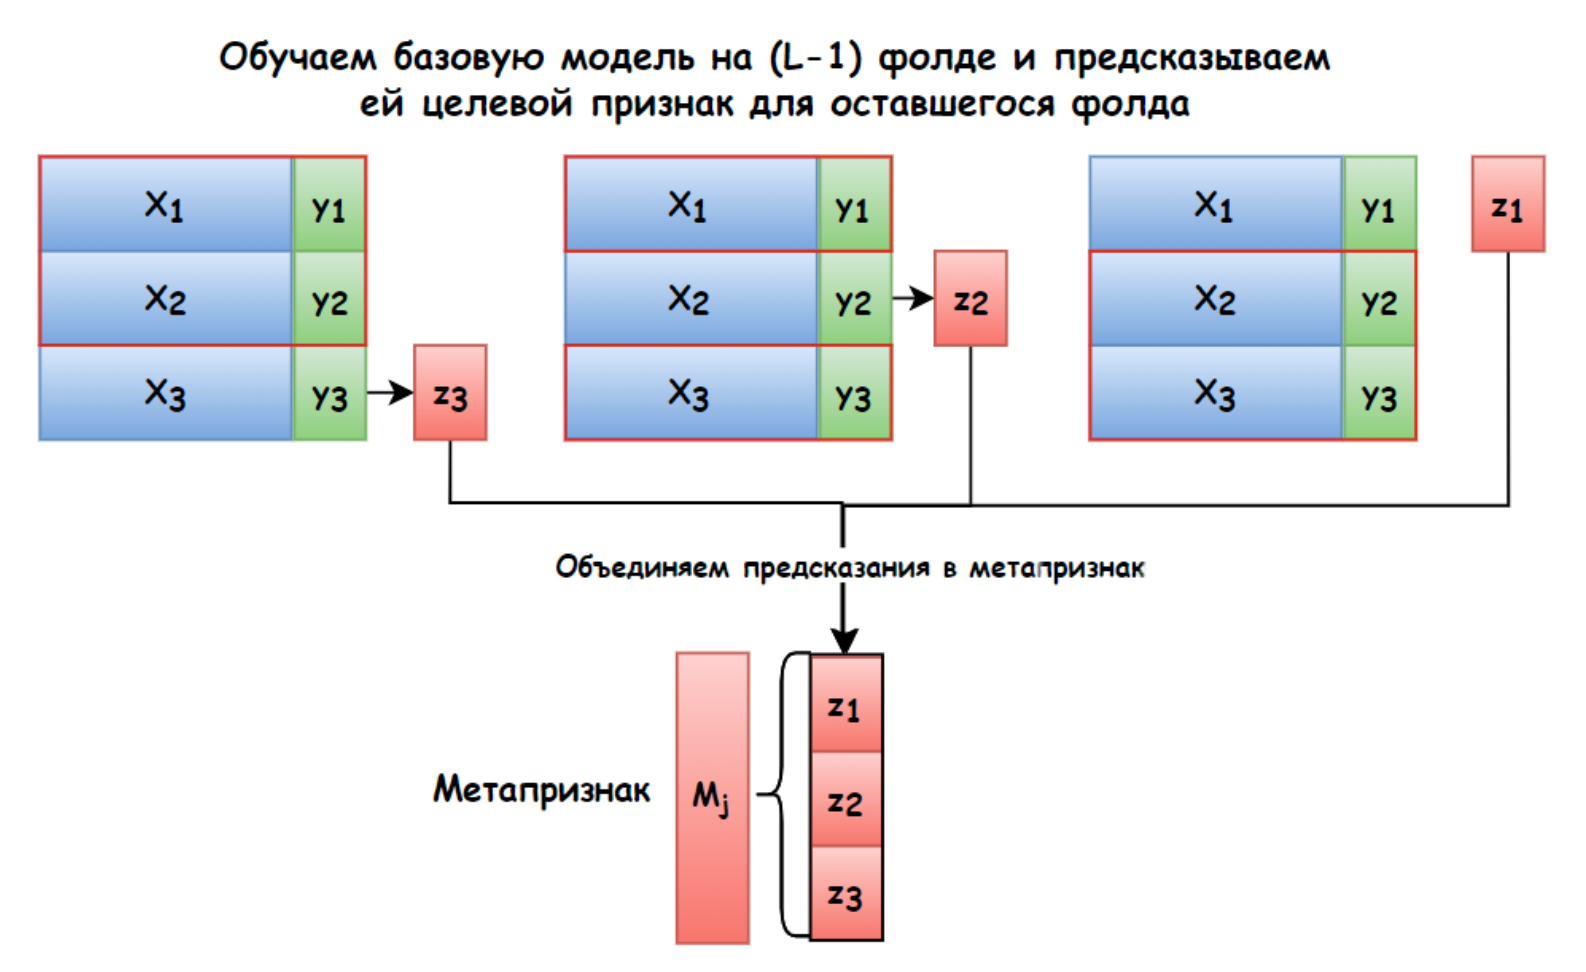

Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать L-1 -фолд как обучающую выборку, а оставшийся — как тестовую. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем шаг 2 для всех базовых моделей, мы получим новый набор данных, состоящий из  метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

Пусть мы взяли три разных модели, т. е. K=3 . Это будет выглядеть следующим образом:

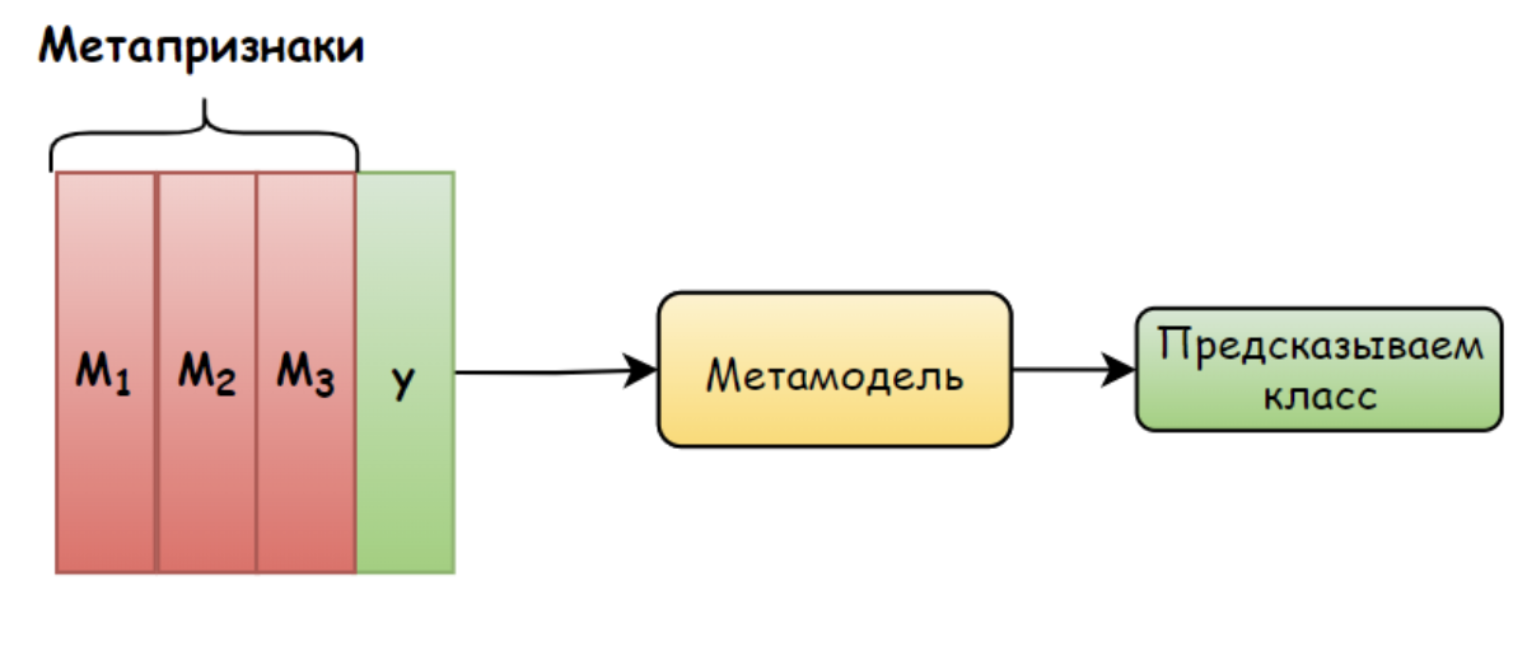

Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые рекомендации, как правильно строить стекинг:

* В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
* В качестве базовых моделей лучшего всего использовать модели различной природы.

Из всех ансамблевых методов стекинг применяется реже всего. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени.

Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

Но, несмотря на эти недостатки, при грамотном подходе опытные специалисты выигрывают соревнования на Kaggle благодаря стекингу. Хотя зачастую таких участников называют «читерами» (от англ. cheat — «жульничать, обманывать»), ведь часто они собирают чуть ли не все возможные ML-модели в стекинг, запускают на мощном сервере подбор внешних параметров и комбинации из этих моделей в стекинге получают заветные 1.5 % прироста качества модели. На Kaggle даже существует фраза — «настекали».

В реальных условиях такой прирост значит мало, поэтому мы не будем концентрироваться на стекинге в нашем курсе, но пример разберём.

##### Практика

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

> Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет.

Как и все ансамбли, модель стекинга находится в модуле ensemble.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


Основные параметры StackingRegressor:

* estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
* final_estimator — метамодель.
* cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

Будем строить стекинг на следующих моделях:
* 'dt' — дерево решений;
* 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
* случайный лес с количеством деревьев, равным 10, в качестве метамодели.

In [ ]:
# Создадим список кортежей в формате ("наименование модели", модель) из этих моделей, и назовем его estimators:

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

In [ ]:
# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле
        random_state=42 #датчик генератора случайных чисел
    )
)
# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [ ]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')


Качество предсказания по MSE для стекинга 3467.74


Посмотреть на метапризнаки можно с помощью метода transform(). Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [ ]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

##### Бустинг

**Бустинг** (boosting) — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

> Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля.

> Бустинг основан на вопросе, поднятом исследователями М. Кернсом и Л. Вэлиантом: «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые веса наблюдений. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

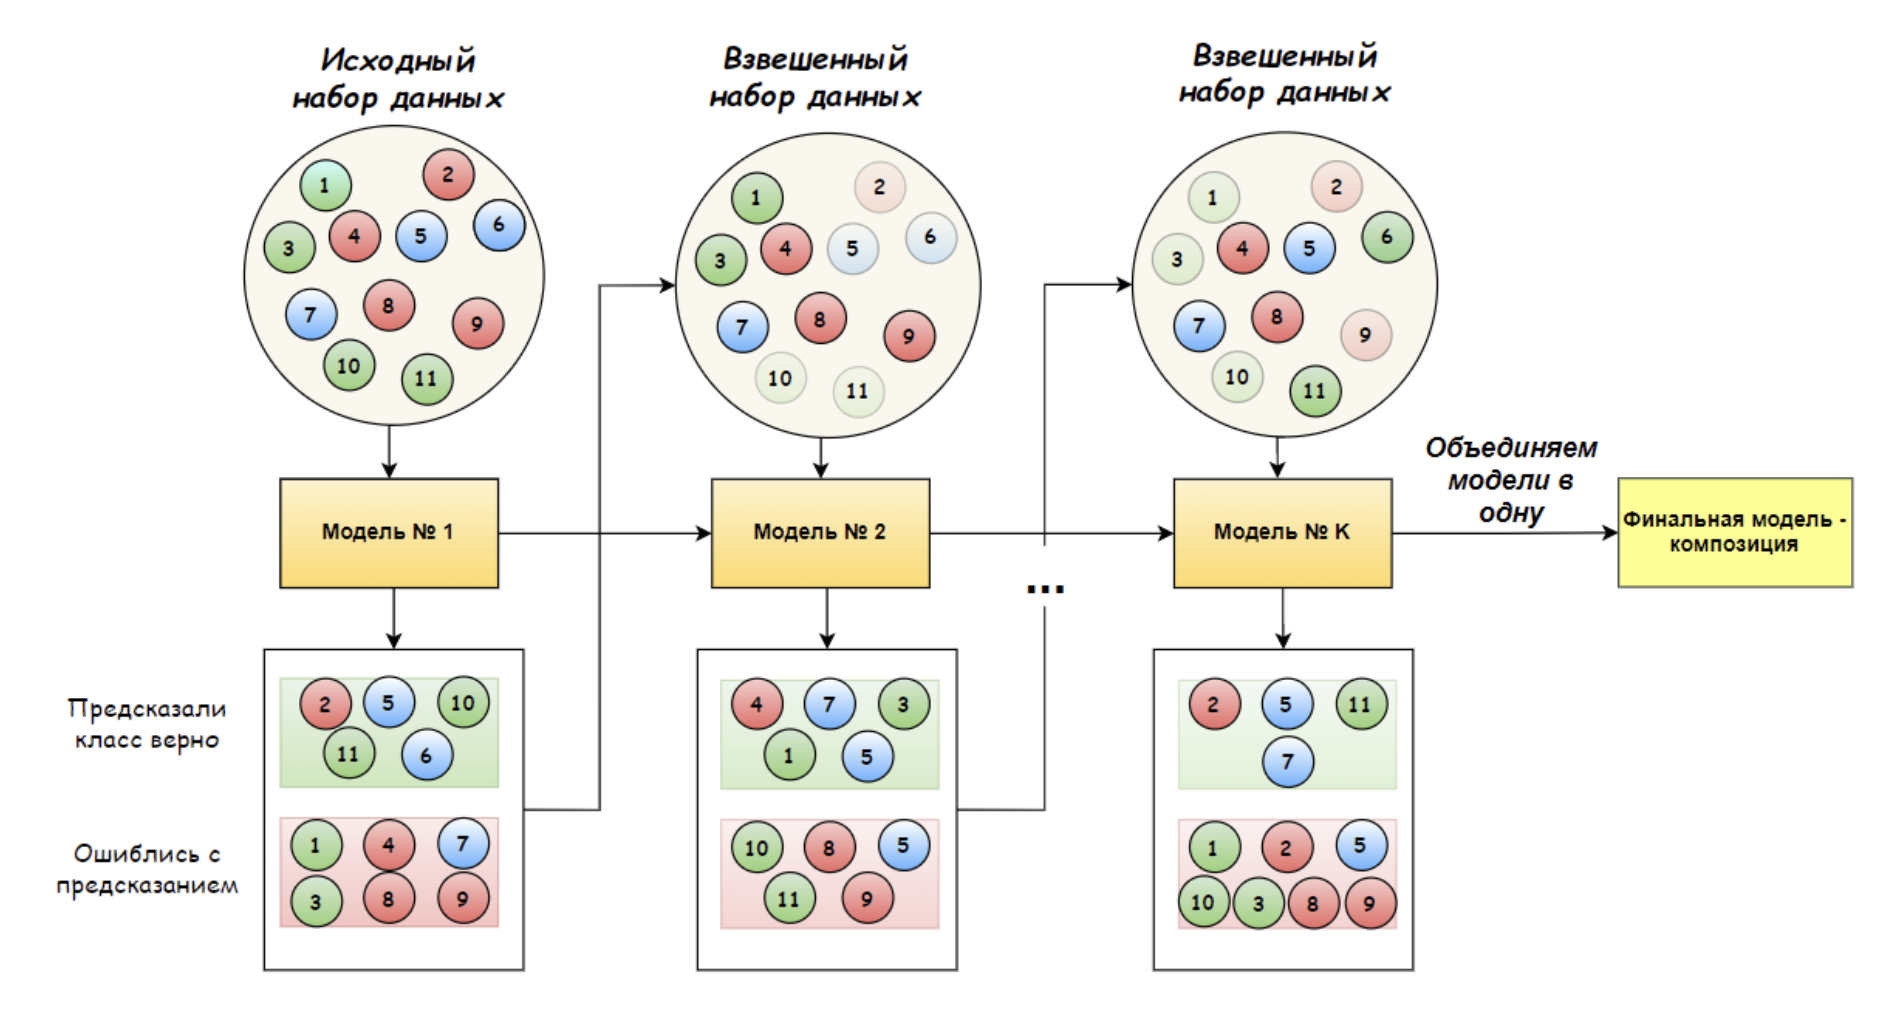

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

* Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

* Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Если бэггинг создавался с целью уменьшить разброс модели, то цель бустинга — уменьшить смещение модели.

> Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают алгоритмы с высоким смещением и небольшим разбросом, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель.



###### Адаптивный бустинг

Первая реализация бустинга называлась **AdaBoost**. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.



Более подробно о алгоритме - https://habr.com/ru/companies/otus/articles/503888/


Плюсы алгоритма:

* Он прост.  Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

* Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

* Показывает хорошую обобщающую способность.

* Имеет возможность идентификации шумовых объектов в ряде случаев.

Минусы:

* Жадное добавление алгоритмов приводит к неоптимальности композиции.

* Склонен к переобучению при наличии шума в данных.

* Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

##### Практика


В sklearn адаптивный бустинг над решающими деревьями реализован в модуле sklearn.ensemble в виде классов AdaBoostRegressor и AdaBoostClassifier для задач регрессии и классификации соответственно. Давайте проведём обучение на тех же данных, что и в предыдущих моделях ансамблирования — на данных о диабете.

параметры AdaBoost:

* estimator — параметр отвечает за природу базовых моделей, по умолчанию это DecisionTreeRegressor c максимальной глубиной (max_depth) 3.
* n_estimators — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.
* learning_rate — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.
* loss{'linear', 'square', 'exponential'} — функция ошибки для обновления весов
* random_state — параметр, фиксирующий случайные процессы в модели.


Для сравнимости результатов со случайным лесом возьмём количество базовых моделей, равное 10. Как говорилось ранее, глубина деревьев должна быть меньше, чем у случайного леса. По умолчанию она равна 3.  

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

Качество предсказания по MSE для AdaBoost 3040.83


**Градиентный бустинг** (Gradient Boosting, GB) — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием.
Хорошая статья - https://education.yandex.ru/handbook/ml/article/gradientnyj-busting

##### Вывод:



**Бэггинг**

Плюсы:
* Хорошо параллелится вычисление (модели обучаются параллельно)
* Снижает дисперсию

Минусы:
* Предполагается использование одинаковых моделей
* Необходимо использование глубоких деревьев
* Плохо интерпретируемая


**Стекинг**

Плюсы:
* Хорошо параллелится (модели обучаются параллельно)
* Хорош для использования различных по природе базовых моделей

Минусы:
* Качество сильно зависит от качества базовых моделей
* Плохо интерпретируемая



**Бустинг**

Плюсы:
* Модели обучаются последовательно, уточняя друг друга
* Снижает смещение
* Базовые модели — неглубокие деревья

Минусы:
* Плохо параллелится вычисление
* Плохо интерпретируемая

#### ДЗ
Используем набор данных о винах. Вам необходимо будет предсказать качество вина по его характеристикам.

1. Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.

2. Разделим на тренировочную и тестовую, параметры test_size=0.2, random_state=42

3. Обучите на тренировочной выборке модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как корень из m, где m — общее количество признаков. В качестве значения параметра random_state возьмите число 42.

4. Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

5. Дополнительно: обучить модель логистической регрессии/попробовать применить другие ансамбли